<a href="https://colab.research.google.com/github/shirleymbeyu/Umojahack-3/blob/main/Financial_Resilience_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up

In [ ]:
!pip install --upgrade fastcore -q
!pip install --upgrade fastai -q

In [ ]:
from fastai.vision.all import * # Needs latest version, and sometimes a restart of the runtime after the pip installs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
vdef = pd.read_csv('VariableDefinitions (1).csv')
vdef

,ID,Person unique/random identification,"For columns(Q1 - Q28), Value 1 - Yes, 2 - No, 3-Don’t Know 4 - refused to answer"
0,country,The country,NaN
1,region,"Region of a given country,.i.e., South Asia, Europe, etc",NaN
2,population,The population of the given country,NaN
3,age,Individual age,NaN
4,Q1,Has ATM/debit card,NaN
5,Q2,Is the ATM connect to an account with your name?,NaN
6,Q3,Purchased with the ATM,NaN
7,Q4,Use of mobile or internet to make payments or send money,NaN
8,Q5,Mobile/internet to check account balance,NaN
9,Q6,Has a credit card,NaN


In [ ]:
tr= pd.read_csv('Train (1).csv')
tr.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,ID_0000020532,Morocco,Middle East & North Africa (excluding high income),25550170.0,66.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,2,2,2,2,2,1,2,2,1,2.0,1.0,1,2,NaN,1,2,2.0,2.0,1.0,1.0,0
1,ID_0000075765,Lebanon,Middle East & North Africa (excluding high income),4591023.0,44.0,2,NaN,NaN,2.0,2.0,2,NaN,1.0,1.0,2,2,2,2,1,2,2,2,1,2,2.0,2.0,1,2,NaN,2,2,2.0,1.0,1.0,1.0,1
2,ID_0000085491,Morocco,Middle East & North Africa (excluding high income),25550170.0,29.0,1,1.0,1.0,2.0,2.0,2,NaN,1.0,1.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1,1,2.0,2,2,2.0,NaN,1.0,1.0,0
3,ID_0000144505,Canada,High income: OECD,30491168.0,44.0,1,1.0,1.0,1.0,1.0,2,NaN,1.0,1.0,1,1,2,1,1,2,2,2,1,2,NaN,NaN,1,1,2.0,1,2,NaN,NaN,1.0,NaN,1
4,ID_0000214184,Mexico,Latin America & Caribbean (excluding high income),93002320.0,36.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,1,2,2,2,2,2,2,2,2,2,2.0,2.0,1,2,NaN,1,2,2.0,2.0,1.0,1.0,1


In [ ]:
tr.shape

(104867, 36)

In [ ]:
ts = pd.read_csv('Test (1).csv')
ts.head()

,ID,country,region,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28
0,ID_0000005111,Croatia,Europe & Central Asia (excluding high income),3557444.5,62.0,2,NaN,NaN,2.0,2.0,1,1.0,1.0,1.0,2,3,2,1,1,2,2,2,2,2,2.0,2.0,2,1,1.0,2,2,2.0,NaN,1.0,1.0
1,ID_0000389416,Kazakhstan,Europe & Central Asia (excluding high income),12920168.0,32.0,2,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,2,2,2,2,2,3,2,2,2,2,2.0,2.0,2,2,NaN,2,2,2.0,2.0,1.0,2.0
2,ID_0000634789,Costa Rica,Latin America & Caribbean (excluding high income),3791520.0,73.0,1,1.0,1.0,2.0,2.0,2,NaN,2.0,2.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,2,2,NaN,2,1,2.0,1.0,1.0,1.0
3,ID_0000778100,Japan,High income: OECD,110566824.0,67.0,1,1.0,1.0,1.0,2.0,1,1.0,1.0,1.0,1,1,2,1,1,2,2,2,2,2,NaN,NaN,1,1,2.0,1,1,NaN,NaN,1.0,NaN
4,ID_0001123210,Morocco,Middle East & North Africa (excluding high income),25550170.0,32.0,1,1.0,1.0,2.0,2.0,2,NaN,2.0,1.0,2,2,2,2,2,2,2,2,2,1,2.0,1.0,2,2,NaN,2,2,2.0,2.0,1.0,1.0


In [ ]:
ts.shape

(44943, 35)

In [ ]:
ss = pd.read_csv('SampleSubmission.csv')
ss.head()

,ID,target
0,ID_0000005111,NaN
1,ID_0000389416,NaN
2,ID_0000634789,NaN
3,ID_0000778100,NaN
4,ID_0001123210,NaN


In [ ]:
ss.shape

(44943, 2)

# Data Understanding

In [ ]:
tr.dtypes

ID              object
country         object
region          object
population     float64
age            float64
Q1               int64
Q2             float64
Q3             float64
Q4             float64
Q5             float64
Q6               int64
Q7             float64
Q8             float64
Q9             float64
Q10a             int64
Q10b             int64
Q11              int64
Q12              int64
Q13a             int64
Q14              int64
Q15              int64
Q16              int64
Q17a             int64
Q17b             int64
Q19            float64
Q20            float64
Q21              int64
Q22              int64
Q23            float64
Q24              int64
Q25              int64
Q26            float64
Q27            float64
owns_mobile    float64
Q28            float64
target           int64
dtype: object

In [ ]:
ts.dtypes

ID              object
country         object
region          object
population     float64
age            float64
Q1               int64
Q2             float64
Q3             float64
Q4             float64
Q5             float64
Q6               int64
Q7             float64
Q8             float64
Q9             float64
Q10a             int64
Q10b             int64
Q11              int64
Q12              int64
Q13a             int64
Q14              int64
Q15              int64
Q16              int64
Q17a             int64
Q17b             int64
Q19            float64
Q20            float64
Q21              int64
Q22              int64
Q23            float64
Q24              int64
Q25              int64
Q26            float64
Q27            float64
owns_mobile    float64
Q28            float64
dtype: object

In [ ]:
tr.isna().sum()

ID                 0
country            0
region           679
population         0
age              287
Q1                 0
Q2             57146
Q3             59653
Q4             47422
Q5             47422
Q6                 0
Q7             84226
Q8             45838
Q9             45838
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            24173
Q20            24173
Q21                0
Q22                0
Q23            67287
Q24                0
Q25                0
Q26            24173
Q27            46438
owns_mobile        1
Q28            31005
target             0
dtype: int64

In [ ]:
ts.isna().sum()

ID                 0
country            0
region           301
population         0
age              124
Q1                 0
Q2             24527
Q3             25595
Q4             20384
Q5             20384
Q6                 0
Q7             36069
Q8             19700
Q9             19700
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            10431
Q20            10431
Q21                0
Q22                0
Q23            28943
Q24                0
Q25                0
Q26            10431
Q27            19837
owns_mobile        1
Q28            13433
dtype: int64

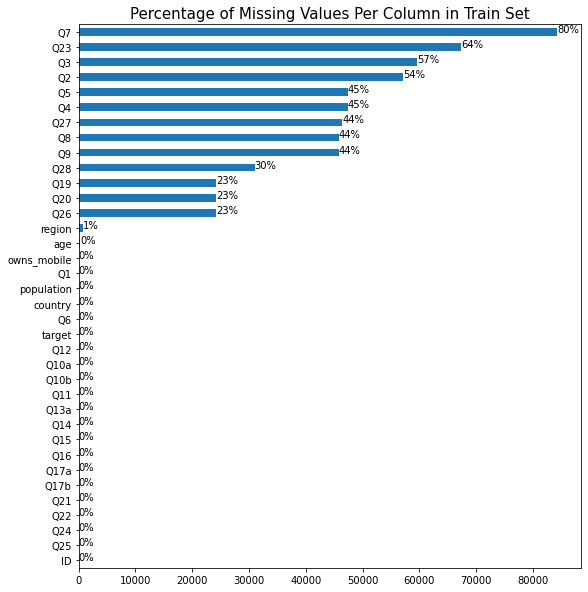

In [ ]:
# Check if there any missing values in train set
ax = tr.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/tr.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

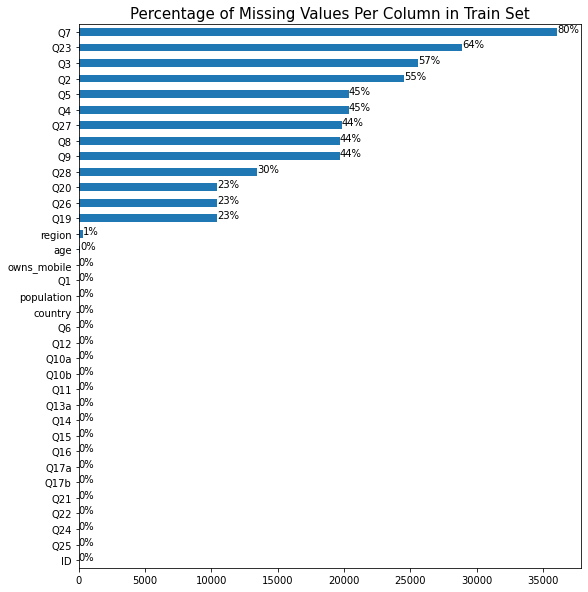

In [ ]:
# Check if there any missing values in train set
ax = ts.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/ts.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [ ]:
#unique elements in our data:
cols = tr.columns.to_list()

for col in cols:
  print('COLUMN:', col)
  print('Number of unique variables:', tr[col].nunique())
  print(tr[col].unique())
  print()

COLUMN: ID
Number of unique variables: 104867
['ID_0000020532' 'ID_0000075765' 'ID_0000085491' ... 'ID_9999406850'
 'ID_9999627239' 'ID_9999859033']

COLUMN: country
Number of unique variables: 144
['Morocco' 'Lebanon' 'Canada' 'Mexico' 'Bahrain' 'Malta' 'Switzerland'
 'Italy' 'Montenegro' 'Latvia' 'Poland' 'Belarus' 'Venezuela, RB' 'Iraq'
 'Indonesia' 'Myanmar' 'Philippines' 'Spain' 'Egypt, Arab Rep.' 'Pakistan'
 'New Zealand' 'Nigeria' 'Uruguay' 'Argentina' 'Australia'
 'Macedonia, FYR' 'Norway' 'Namibia' 'Georgia' 'Czech Republic'
 'Mauritius' 'Ghana' 'Honduras' 'Jordan' 'Kuwait' 'Denmark' 'Lao PDR'
 'Congo, Dem. Rep.' 'Saudi Arabia' 'Liberia' 'Taiwan, China' 'Nepal'
 'Botswana' 'Sierra Leone' 'Lithuania' 'China' 'Sri Lanka' 'Malawi'
 'El Salvador' 'Nicaragua' 'Benin' 'Armenia' 'Thailand' "Cote d'Ivoire"
 'France' 'Niger' 'Paraguay' 'Colombia' 'Sweden' 'Russian Federation'
 'Iran, Islamic Rep.' 'Libya' 'Uzbekistan' 'South Sudan' 'Bulgaria'
 'West Bank and Gaza' 'Gabon' 'Israel' 'Bol

In [ ]:
#checking for duplicates
tr.duplicated().any()

False

In [ ]:
ts.duplicated().any()

False

# Data Cleaning

From here we'll work with a combination of the train and test to speed things up

In [ ]:
# Combine train and test set
ntr = tr.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((tr, ts)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')

The shape of the combined dataframe is: (149810, 36)


In [ ]:
# Category columns
cat_cols = ['country',	'region', 'owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
num_cols = ['age', 'population']

# Change columns to their respective datatypes
all_data[cat_cols] = all_data[cat_cols].astype('category')

# Confirm whether the changes have been successful
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 36 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   ID           149810 non-null  object  
 1   country      149810 non-null  category
 2   region       148830 non-null  category
 3   population   149810 non-null  float64 
 4   age          149399 non-null  float64 
 5   Q1           149810 non-null  category
 6   Q2           68137 non-null   category
 7   Q3           64562 non-null   category
 8   Q4           82004 non-null   category
 9   Q5           82004 non-null   category
 10  Q6           149810 non-null  category
 11  Q7           29515 non-null   category
 12  Q8           84272 non-null   category
 13  Q9           84272 non-null   category
 14  Q10a         149810 non-null  category
 15  Q10b         149810 non-null  category
 16  Q11          149810 non-null  category
 17  Q12          149810 non-null  category
 18  Q13a

I saw it fit to delete the Columns with more than half of the missing values: Q7, Q23, Q3, Q2

The population column

In [ ]:
all_data = all_data.drop(['ID','population','Q2',	'Q3','Q7', 'Q23'], axis =1)

In [ ]:
all_data['age'].describe()

count    149399.000000
mean         41.801063
std          17.849790
min          15.000000
25%          27.000000
50%          39.000000
75%          55.000000
max          99.000000
Name: age, dtype: float64

In [ ]:
all_data.isna().sum()

country            0
region           980
age              411
Q1                 0
Q4             67806
Q5             67806
Q6                 0
Q8             65538
Q9             65538
Q10a               0
Q10b               0
Q11                0
Q12                0
Q13a               0
Q14                0
Q15                0
Q16                0
Q17a               0
Q17b               0
Q19            34604
Q20            34604
Q21                0
Q22                0
Q24                0
Q25                0
Q26            34604
Q27            66275
owns_mobile        2
Q28            44438
target         44943
dtype: int64

In [ ]:
# Fill in missing values
# For cat cols and date cols fill in with mode
for col in all_data.columns:
  if col in cat_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
  #elif col in num_cols:
    #all_data[col] = all_data[col].fillna(all_data[col].mean()[0])

# Confirm that there aren't any missing values
#all_data[all_data.columns.difference(['target'])].isna().sum().any()

In [ ]:
#filling age with the mean value
all_data['age'].fillna(all_data['age'].mean(), inplace=True)

In [ ]:
all_data[:10]

,country,region,age,Q1,Q4,Q5,Q6,Q8,Q9,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q19,Q20,Q21,Q22,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,Morocco,Middle East & North Africa (excluding high income),66.0,2,2.0,2.0,2,1.0,1.0,2,2,2,2,2,2,1,2,2,1,2.0,1.0,1,2,1,2,2.0,2.0,1.0,1.0,0.0
1,Lebanon,Middle East & North Africa (excluding high income),44.0,2,2.0,2.0,2,1.0,1.0,2,2,2,2,1,2,2,2,1,2,2.0,2.0,1,2,2,2,2.0,1.0,1.0,1.0,1.0
2,Morocco,Middle East & North Africa (excluding high income),29.0,1,2.0,2.0,2,1.0,1.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1,1,2,2,2.0,2.0,1.0,1.0,0.0
3,Canada,High income: OECD,44.0,1,1.0,1.0,2,1.0,1.0,1,1,2,1,1,2,2,2,1,2,2.0,2.0,1,1,1,2,2.0,2.0,1.0,1.0,1.0
4,Mexico,Latin America & Caribbean (excluding high income),36.0,2,2.0,2.0,2,1.0,1.0,1,2,2,2,2,2,2,2,2,2,2.0,2.0,1,2,1,2,2.0,2.0,1.0,1.0,1.0
5,Bahrain,High income: nonOECD,52.0,1,1.0,1.0,2,1.0,1.0,1,2,2,2,2,1,2,2,2,2,2.0,2.0,1,1,2,2,2.0,2.0,1.0,1.0,1.0
6,Malta,High income: nonOECD,61.0,1,1.0,1.0,1,1.0,1.0,1,1,1,1,1,2,2,2,2,2,2.0,2.0,1,2,2,2,2.0,1.0,1.0,1.0,1.0
7,Switzerland,High income: OECD,42.0,1,1.0,1.0,1,1.0,1.0,2,1,1,1,1,2,2,2,2,2,2.0,2.0,1,2,2,2,2.0,1.0,1.0,1.0,1.0
8,Italy,High income: OECD,41.0,1,2.0,1.0,1,1.0,1.0,1,2,2,1,1,1,2,2,2,2,2.0,2.0,1,1,1,2,2.0,2.0,1.0,1.0,1.0
9,Montenegro,Europe & Central Asia (excluding high income),65.0,2,2.0,2.0,2,1.0,1.0,2,2,2,2,2,2,2,2,2,2,2.0,2.0,1,2,2,1,2.0,2.0,1.0,1.0,1.0


# Data Preparation

In [ ]:
cat_cols = ['country',	'region', 'owns_mobile'] + [x for x in all_data.columns if x.startswith('Q')]
num_cols = ['age']

# Change columns to their respective datatypes
all_data[cat_cols] = all_data[cat_cols].astype('category')

# Confirm whether the changes have been successful
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149810 entries, 0 to 149809
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   country      149810 non-null  category
 1   region       149810 non-null  category
 2   age          149810 non-null  float64 
 3   Q1           149810 non-null  category
 4   Q4           149810 non-null  category
 5   Q5           149810 non-null  category
 6   Q6           149810 non-null  category
 7   Q8           149810 non-null  category
 8   Q9           149810 non-null  category
 9   Q10a         149810 non-null  category
 10  Q10b         149810 non-null  category
 11  Q11          149810 non-null  category
 12  Q12          149810 non-null  category
 13  Q13a         149810 non-null  category
 14  Q14          149810 non-null  category
 15  Q15          149810 non-null  category
 16  Q16          149810 non-null  category
 17  Q17a         149810 non-null  category
 18  Q17b

In [ ]:
# Use one hot encoding to turn categorical features to numerical features
# Encode categorical features
all_data = pd.get_dummies(data = all_data, columns = cat_cols)
all_data.head()

,age,target,country_Afghanistan,country_Albania,country_Algeria,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Belgium,country_Benin,country_Bolivia,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,"country_Congo, Dem. Rep.","country_Congo, Rep.",country_Costa Rica,country_Cote d'Ivoire,country_Croatia,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominican Republic,country_Ecuador,"country_Egypt, Arab Rep.",...,Q17b_1,Q17b_2,Q17b_3,Q17b_4,Q19_1.0,Q19_2.0,Q19_3.0,Q19_4.0,Q20_1.0,Q20_2.0,Q20_3.0,Q20_4.0,Q21_1,Q21_2,Q21_3,Q21_4,Q22_1,Q22_2,Q22_3,Q22_4,Q24_1,Q24_2,Q24_3,Q24_4,Q25_1,Q25_2,Q25_3,Q25_4,Q26_1.0,Q26_2.0,Q26_3.0,Q26_4.0,Q27_1.0,Q27_2.0,Q27_3.0,Q27_4.0,Q28_1.0,Q28_2.0,Q28_3.0,Q28_4.0
0,66.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,44.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,29.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
3,44.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
4,36.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Separate train and test data from the combined dataframe
train = all_data[:ntr]
test = all_data[ntr:]

# Check the shapes of the split dataset
train.shape, test.shape

((104867, 258), (44943, 258))

In [ ]:
test = test.drop('target', axis = 1)

In [ ]:
test.shape

(44943, 257)

# Model

In [ ]:
# Select main columns to be used in training
main_cols = all_data.columns.difference(['target'])
X = train[main_cols]
y = train.target.astype(int)

In [ ]:
!pip install xgboost==0.90

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [ ]:
#import classifier algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# create models
lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
et_model = ExtraTreesClassifier()
xg_model = XGBClassifier()
lgbm_model = LGBMClassifier()

#training the models
lg_model.fit(X_train,y_train)
rf_model.fit(X_train,y_train)
kn_model.fit(X_train,y_train)
et_model.fit(X_train,y_train)
xg_model.fit(X_train,y_train)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
#making predictions
lg_y_pred = lg_model.predict_proba(X_test)[:, 1]
rf_y_pred = rf_model.predict_proba(X_test)[:, 1]
kn_y_pred = kn_model.predict_proba(X_test)[:, 1]
et_y_pred = et_model.predict_proba(X_test)[:, 1]
xg_y_pred = xg_model.predict_proba(X_test)[:, 1]
lgbm_y_pred = lgbm_model.predict_proba(X_test)[:, 1]

In [ ]:
rf_y_pred

array([0.63428571, 0.65      , 0.71      , ..., 0.39      , 0.15      ,
       0.83      ])

In [ ]:
lgbm_y_pred

array([0.49865873, 0.74154892, 0.70581466, ..., 0.44425448, 0.15393049,
       0.74938966])

## Evaluation

The error metric for this competition is the Area Under the Curve (AUC).

In [ ]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# evaluate the model
# roc_auc_score
print("Logistic Regression classifier: ", roc_auc_score(y_test, lg_y_pred))
print("Random Forest classifier: ", roc_auc_score(y_test, rf_y_pred))
print("KNeighbors Classifier: ", roc_auc_score(y_test, kn_y_pred))
print("Extra Tree classifier: ", roc_auc_score(y_test, et_y_pred))
print("XGB classifier: ", roc_auc_score(y_test, xg_y_pred))
print('LGBM AUC score on the X_test is:', roc_auc_score(y_test, lgbm_y_pred))

Logistic Regression classifier:  0.7838946239996418
Random Forest classifier:  0.7599701349184751
KNeighbors Classifier:  0.7139510235384817
Extra Tree classifier:  0.7297524851663688
XGB classifier:  0.7751125058365858
LGBM AUC score on the X_test is: 0.7953472417199544


## Increasing Model Perfomance

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Optimize model paramaters 
param_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3,5]
        }
my_xg_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xg_model.fit(X_train, y_train)
print(my_xg_model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 94.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 109.8min finished


{'gamma': 1, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.6}


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=5, gamma=1, subsample=0.6, max_depth=5)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict_proba(X_test)[:, 1]

# Get error rate
print("New XGB classifier: ", roc_auc_score(y_test, y_pred))

# Submission

In [ ]:
X_train[:4]

,Q10a_1,Q10a_2,Q10a_3,Q10a_4,Q10b_1,Q10b_2,Q10b_3,Q10b_4,Q11_1,Q11_2,Q11_3,Q11_4,Q12_1,Q12_2,Q12_3,Q12_4,Q13a_1,Q13a_2,Q13a_3,Q13a_4,Q14_1,Q14_2,Q14_3,Q14_4,Q15_1,Q15_2,Q15_3,Q15_4,Q16_1,Q16_2,Q16_3,Q16_4,Q17a_1,Q17a_2,Q17a_3,Q17a_4,Q17b_1,Q17b_2,Q17b_3,Q17b_4,...,country_Slovenia,country_South Africa,country_South Sudan,country_Spain,country_Sri Lanka,country_Sweden,country_Switzerland,"country_Taiwan, China",country_Tajikistan,country_Tanzania,country_Thailand,country_Togo,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,"country_Venezuela, RB",country_Vietnam,country_West Bank and Gaza,country_Zambia,country_Zimbabwe,owns_mobile_1.0,owns_mobile_2.0,owns_mobile_3.0,owns_mobile_4.0,region_East Asia & Pacific (excluding high income),region_Europe & Central Asia (excluding high income),region_High income: OECD,region_High income: nonOECD,region_Latin America & Caribbean (excluding high income),region_Middle East & North Africa (excluding high income),region_South Asia,region_Sub-Saharan Africa (excluding high income)
91959,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
15991,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
14045,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
77523,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
test[:4]

In [ ]:
# Get the predicted result for the test Data with the model of choice
prediction = xgb_model.predict_proba(test)

Making submision file:

In [ ]:
# # Create a submission file
sub_file = ss.copy()
sub_file.target = prediction

In [ ]:
sub_file.to_csv('1st.csv', index = False)
sub_file.head()